# Setup

In [48]:
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import os

In [49]:
def get_section_results(file):
    eval_returns = {}
    for e in summary_iterator(file):
        for v in e.summary.value:
            if v.tag not in eval_returns:
                eval_returns[v.tag] = [v.simple_value]
            else:
                eval_returns[v.tag].append(v.simple_value)
    return eval_returns

In [50]:
tb_filenames = os.listdir("data/")
for i in range(len(tb_filenames)):
    tb_filenames[i] = "data/" + tb_filenames[i]
    curr_file_names = [s for s in os.listdir(tb_filenames[i]) if s[-3:] == 'cal']
    tb_filenames[i] = tb_filenames[i] + "/" + curr_file_names[0]

tb_filenames = np.array(tb_filenames)
pprint(tb_filenames)

array(['data/hw5_expl_q2_dqn_numsteps_5000_PointmassMedium-v0_25-11-2020_21-11-34/events.out.tfevents.1606367494.Aryans-MacBook-Pro.local',
       'data/hw5_expl_q2_cql_numsteps_15000_PointmassMedium-v0_25-11-2020_20-40-08/events.out.tfevents.1606365608.Aryans-MacBook-Pro.local',
       'data/hw5_expl_q1_env2_rnd_PointmassMedium-v0_24-11-2020_16-57-39/events.out.tfevents.1606265859.Aryans-MacBook-Pro.local',
       'data/hw5_expl_q1_env1_rnd_PointmassEasy-v0_24-11-2020_15-33-56/events.out.tfevents.1606260836.Aryans-MacBook-Pro.local',
       'data/hw5_expl_q1_alg_hard_PointmassHard-v0_26-11-2020_15-56-48/events.out.tfevents.1606435008.Aryans-MacBook-Pro.local',
       'data/hw5_expl_q2_alpha0.02_PointmassMedium-v0_25-11-2020_21-48-46/events.out.tfevents.1606369726.Aryans-MacBook-Pro.local',
       'data/hw5_expl_q3_hard_dqn_PointmassHard-v0_26-11-2020_14-15-33/events.out.tfevents.1606428933.Aryans-MacBook-Pro.local',
       'data/hw5_expl_q3_medium_dqn_PointmassMedium-v0_25-11-2020_21-

In [51]:
pprint(get_section_results(tb_filenames[4]).keys())

dict_keys(['Train_EnvstepsSoFar', 'TimeSinceStart', 'Eval_AverageReturn', 'Eval_StdReturn', 'Eval_MaxReturn', 'Eval_MinReturn', 'Eval_AverageEpLen', 'Buffer_size', 'Train_AverageReturn', 'Train_BestReturn', 'Exploration_Critic_Loss', 'Exploitation_Critic_Loss', 'Exploration_Model_Loss'])


In [52]:
!ls

Plotter.ipynb          data                   run_hw5_expl.ipynb
README.md              hw5.pdf                setup.py
cs285                  requirements.txt
cs285.egg-info         requirements_colab.txt


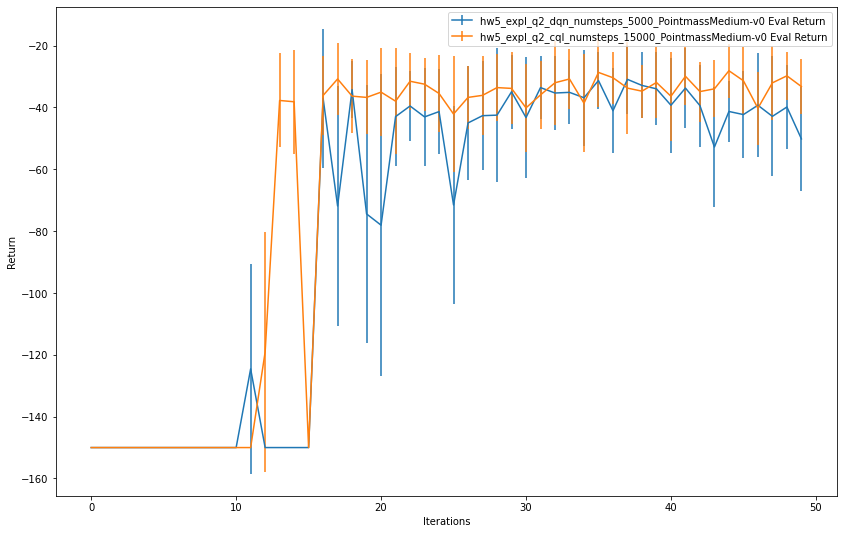

In [53]:
def plot_eval_return(filename, experiment_name = "", fmt = None):
    if experiment_name == "":
        experiment_name = filename[5:]
        experiment_name = experiment_name[:experiment_name.index("/")]
        experiment_name = experiment_name[::-1]
        experiment_name = experiment_name[experiment_name.index("_")+1:]
        experiment_name = experiment_name[experiment_name.index("_")+1:]
        experiment_name = experiment_name[::-1]
        #print(experiment_name)
    data = get_section_results(filename)
    eval_avg_return = data['Eval_AverageReturn']
    eval_std = data['Eval_StdReturn']
    iters = np.arange(len(eval_avg_return))
    
    if fmt:
        plt.errorbar(iters, eval_avg_return, eval_std, label = experiment_name + " Eval Return", fmt=fmt)
    else:
        plt.errorbar(iters, eval_avg_return, eval_std, label = experiment_name + " Eval Return")
    
    plt.xlabel("Iterations")
    plt.ylabel("Return")
    plt.legend()
    
def plot_train_return(filename, experiment_name = "", fmt = None):
    if experiment_name == "":
        experiment_name = filename[5:]
        experiment_name = experiment_name[:experiment_name.index("/")]
        experiment_name = experiment_name[::-1]
        experiment_name = experiment_name[experiment_name.index("_")+1:]
        experiment_name = experiment_name[experiment_name.index("_")+1:]
        experiment_name = experiment_name[::-1]
        #print(experiment_name)
    data = get_section_results(filename)
    eval_avg_return = data['Train_AverageReturn']
    eval_std = data['Train_StdReturn']
    iters = np.arange(len(eval_avg_return))
    
    if fmt:
        plt.errorbar(iters, eval_avg_return, eval_std, label = experiment_name + " Eval Return", fmt=fmt)
    else:
        plt.errorbar(iters, eval_avg_return, eval_std, label = experiment_name + " Eval Return")
    
    plt.xlabel("Iterations")
    plt.ylabel("Return")
    plt.legend()

plt.figure(figsize=(14, 9))
plot_eval_return(tb_filenames[0])
plot_eval_return(tb_filenames[1])

In [54]:
q1_files = [name for name in tb_filenames if name[:16] == 'data/hw5_expl_q1']
q1_files

['data/hw5_expl_q1_env2_rnd_PointmassMedium-v0_24-11-2020_16-57-39/events.out.tfevents.1606265859.Aryans-MacBook-Pro.local',
 'data/hw5_expl_q1_env1_rnd_PointmassEasy-v0_24-11-2020_15-33-56/events.out.tfevents.1606260836.Aryans-MacBook-Pro.local',
 'data/hw5_expl_q1_alg_hard_PointmassHard-v0_26-11-2020_15-56-48/events.out.tfevents.1606435008.Aryans-MacBook-Pro.local',
 'data/hw5_expl_q1_env2_random_PointmassMedium-v0_24-11-2020_17-24-41/events.out.tfevents.1606267481.Aryans-MacBook-Pro.local',
 'data/hw5_expl_q1_alg_med_PointmassMedium-v0_26-11-2020_15-40-22/events.out.tfevents.1606434022.Aryans-MacBook-Pro.local',
 'data/hw5_expl_q1_env1_random_PointmassEasy-v0_24-11-2020_16-21-30/events.out.tfevents.1606263690.Aryans-MacBook-Pro.local']

Text(0.5, 1.0, 'Custom exploration for pointmass medium and hard')

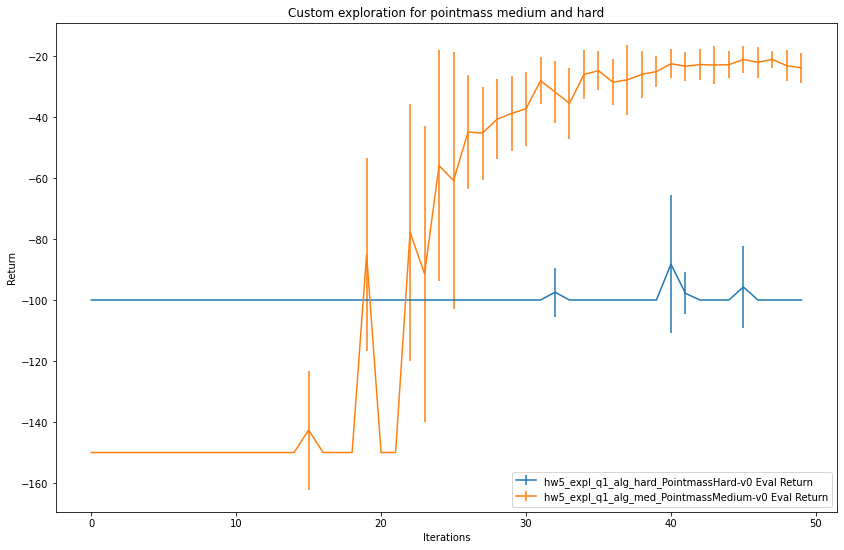

In [57]:
plt.figure(figsize=(14, 9))

plot_eval_return(q1_files[2])
plot_eval_return(q1_files[4])
plt.legend(loc = 'lower right')
plt.title("Custom exploration for pointmass medium and hard")

Text(0.5, 1.0, 'RND vs Random exploration for pointmass easy')

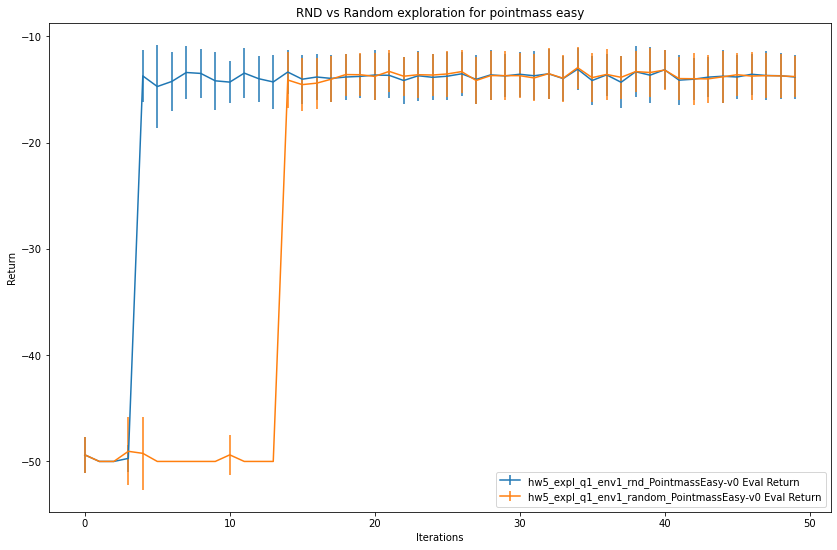

In [46]:
plt.figure(figsize=(14, 9))

plot_eval_return(q1_files[1])
plot_eval_return(q1_files[3])
plt.legend(loc = 'lower right')
plt.title("RND vs Random exploration for pointmass easy")

In [58]:
q2_files = [name for name in tb_filenames if name[:16] == 'data/hw5_expl_q2']
q2_files

['data/hw5_expl_q2_dqn_numsteps_5000_PointmassMedium-v0_25-11-2020_21-11-34/events.out.tfevents.1606367494.Aryans-MacBook-Pro.local',
 'data/hw5_expl_q2_cql_numsteps_15000_PointmassMedium-v0_25-11-2020_20-40-08/events.out.tfevents.1606365608.Aryans-MacBook-Pro.local',
 'data/hw5_expl_q2_alpha0.02_PointmassMedium-v0_25-11-2020_21-48-46/events.out.tfevents.1606369726.Aryans-MacBook-Pro.local',
 'data/hw5_expl_q2_alpha0.5_PointmassMedium-v0_25-11-2020_22-08-50/events.out.tfevents.1606370930.Aryans-MacBook-Pro.local',
 'data/hw5_expl_q2_dqn_numsteps_15000_PointmassMedium-v0_25-11-2020_21-27-59/events.out.tfevents.1606368479.Aryans-MacBook-Pro.local',
 'data/hw5_expl_q2_cql_PointmassMedium-v0_25-11-2020_19-57-44/events.out.tfevents.1606363064.Aryans-MacBook-Pro.local',
 'data/hw5_expl_q2_cql_numsteps_5000_PointmassMedium-v0_25-11-2020_20-24-14/events.out.tfevents.1606364654.Aryans-MacBook-Pro.local',
 'data/hw5_expl_q2_dqn_PointmassMedium-v0_25-11-2020_19-37-37/events.out.tfevents.160636185

Text(0.5, 1.0, '5000 vs 15000 numsteps exploration for DQNs')

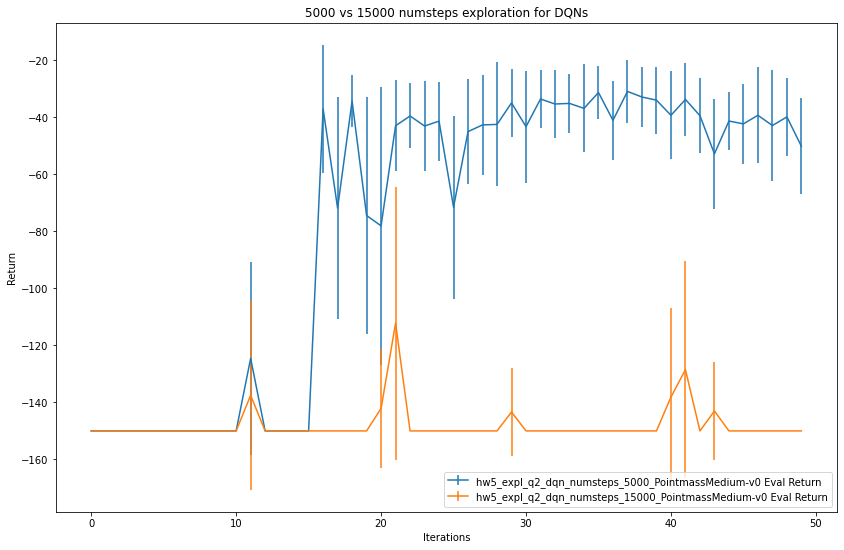

In [60]:
plt.figure(figsize=(14, 9))

plot_eval_return(q2_files[0])
plot_eval_return(q2_files[4])
plt.legend(loc = 'lower right')
plt.title("5000 vs 15000 numsteps exploration for DQNs")

Text(0.5, 1.0, '5000 vs 15000 numsteps exploration for CQLs')

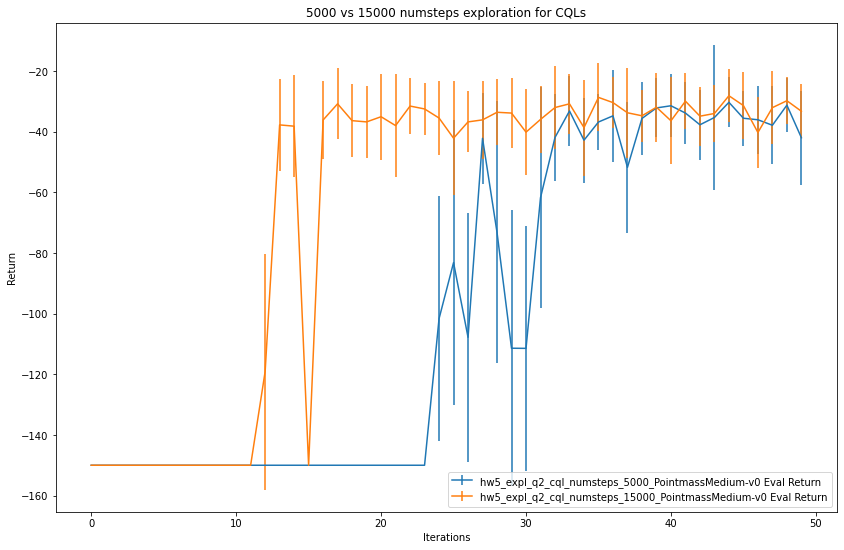

In [63]:
plt.figure(figsize=(14, 9))

plot_eval_return(q2_files[-2])
plot_eval_return(q2_files[1])
plt.legend(loc = 'lower right')
plt.title("5000 vs 15000 numsteps exploration for CQLs")

Text(0.5, 1.0, 'DQN vs CQL performance')

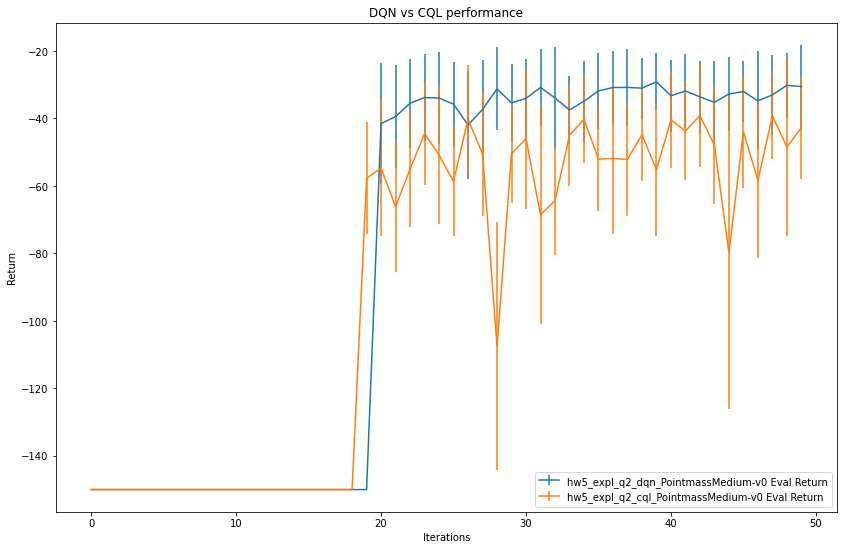

In [65]:
plt.figure(figsize=(14, 9))

plot_eval_return(q2_files[-1])
plot_eval_return(q2_files[-3])
plt.legend(loc = 'lower right')
plt.title("DQN vs CQL performance")

Text(0.5, 1.0, 'CQL with alpha 0.02 and 0.5 performance')

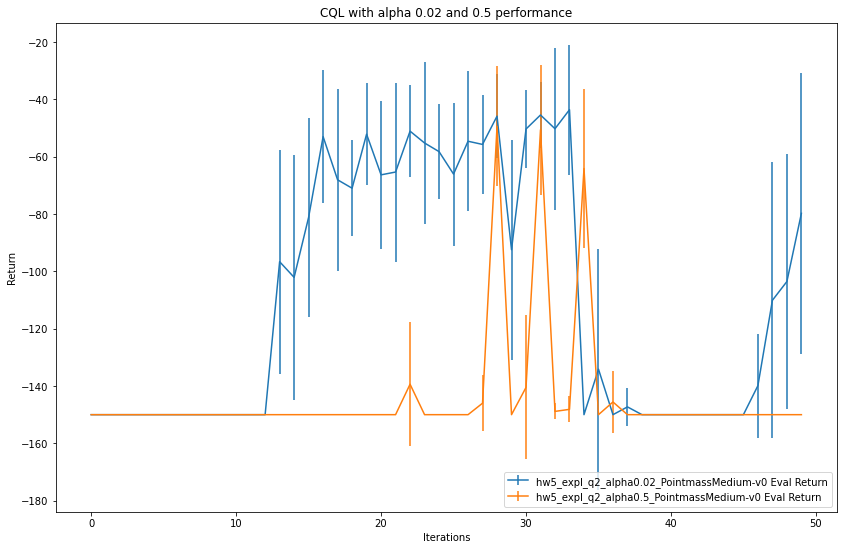

In [67]:
plt.figure(figsize=(14, 9))

plot_eval_return(q2_files[2])
plot_eval_return(q2_files[3])
plt.legend(loc = 'lower right')
plt.title("CQL with alpha 0.02 and 0.5 performance")

In [68]:
q3_files = [name for name in tb_filenames if name[:16] == 'data/hw5_expl_q3']
q3_files

['data/hw5_expl_q3_hard_dqn_PointmassHard-v0_26-11-2020_14-15-33/events.out.tfevents.1606428933.Aryans-MacBook-Pro.local',
 'data/hw5_expl_q3_medium_dqn_PointmassMedium-v0_25-11-2020_21-53-56/events.out.tfevents.1606370036.Aryans-MacBook-Pro.local',
 'data/hw5_expl_q3_hard_cql_PointmassHard-v0_26-11-2020_14-37-04/events.out.tfevents.1606430224.Aryans-MacBook-Pro.local',
 'data/hw5_expl_q3_medium_cql_PointmassMedium-v0_25-11-2020_22-17-20/events.out.tfevents.1606371440.Aryans-MacBook-Pro.local']

Text(0.5, 1.0, 'DQN vs CQL performance on Medium')

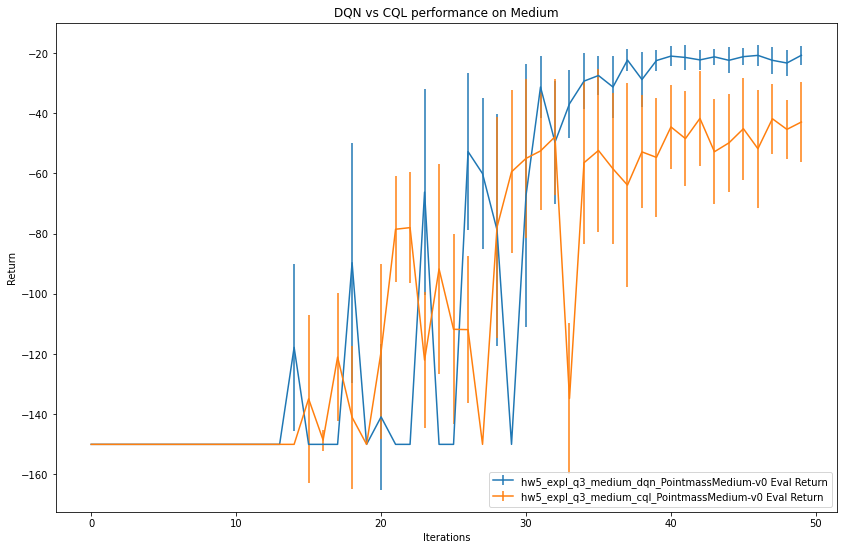

In [69]:
plt.figure(figsize=(14, 9))

plot_eval_return(q3_files[1])
plot_eval_return(q3_files[3])
plt.legend(loc = 'lower right')
plt.title("DQN vs CQL performance on Medium")

Text(0.5, 1.0, 'DQN vs CQL performance on Hard')

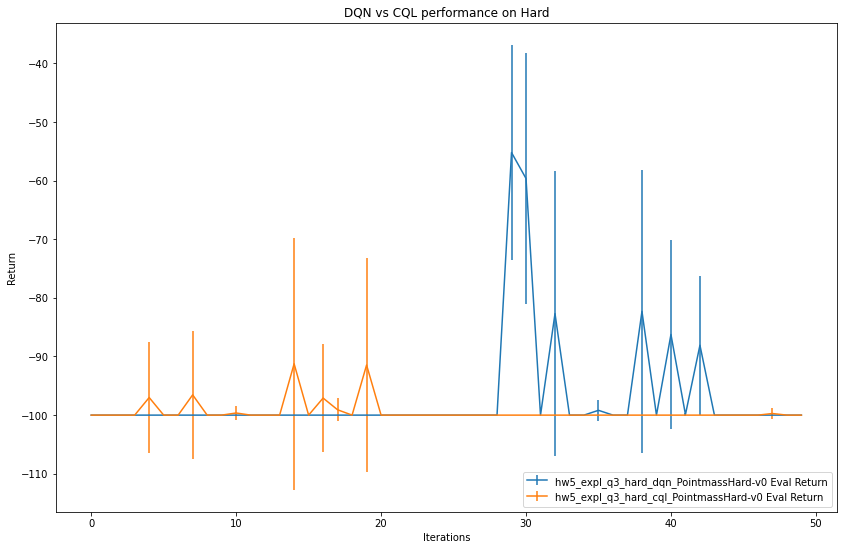

In [71]:
plt.figure(figsize=(14, 9))

plot_eval_return(q3_files[0])
plot_eval_return(q3_files[2])
plt.legend(loc = 'lower right')
plt.title("DQN vs CQL performance on Hard")